In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


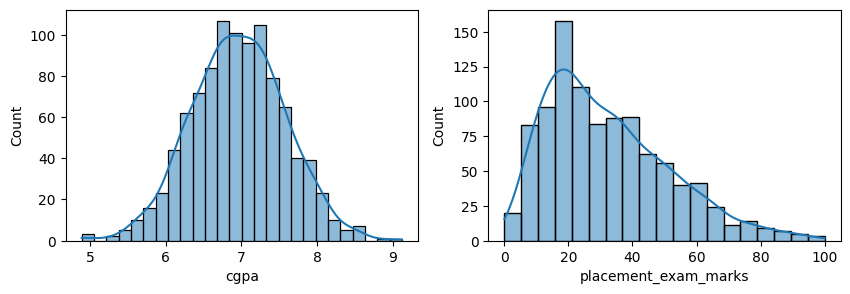

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

sns.histplot(df["cgpa"], kde=True, ax=ax1)
sns.histplot(df["placement_exam_marks"], kde=True, ax=ax2)

plt.show()

#### By seeing the plot we can say that we can apply z-score only on cgpa because only that is normally distributed

In [5]:
print("Mean value of cgpa: ", df["cgpa"].mean())
print("Std value of cgpa: ", df["cgpa"].std())
print("Minimum value of cgpa: ", df["cgpa"].min())
print("Maximum value of cgpa: ", df["cgpa"].max())

Mean value of cgpa:  6.96124
Std value of cgpa:  0.6158978751323896
Minimum value of cgpa:  4.89
Maximum value of cgpa:  9.12


### Finding boundary values

In [6]:
# μ + 3σ and μ - 3σ

print("Highest allowed", df["cgpa"].mean() + 3*df["cgpa"].std())
print("Lowest allowed", df["cgpa"].mean() - 3*df["cgpa"].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


#### Finding outliers with the help of boundary values

In [7]:
df[ ( df["cgpa"] > 8.80 ) | (df["cgpa"] < 5.11 ) ]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### We have found the outliers. Now we can do either of two things</br>
1. Trimming
2. Capping

### 1. Trimming

In [8]:
new_df = df[ ( df["cgpa"] < 8.80 ) & (df["cgpa"] > 5.11 ) ]
new_df

# five outlier rows gone

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### 2. Another approach

#### Calculating the z score

In [9]:
df["cgpa_zscore"] = (df["cgpa"] - df["cgpa"].mean()) / df["cgpa"].std()

In [10]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


#### Now if the z score is less than -3 or greater than 3 then they are outliers

In [12]:
df[df["cgpa_zscore"] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [13]:
df[df["cgpa_zscore"] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [15]:
df[ (df["cgpa_zscore"] > 3) | (df["cgpa_zscore"] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


#### Now trimming

In [17]:
new_df = df[ (df["cgpa_zscore"] < 3) & (df["cgpa_zscore"] > -3) ]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### 2. Capping

In [18]:
upper_limit = df["cgpa"].mean() + 3*df["cgpa"].std()
lower_limit = df["cgpa"].mean() - 3*df["cgpa"].std()

In [21]:
print(upper_limit, lower_limit)

8.808933625397168 5.113546374602832


In [22]:
df["cgpa"] = np.where(
    df["cgpa"] > upper_limit,
    upper_limit,
    np.where(
        df["cgpa"] < lower_limit,
        lower_limit,
        df["cgpa"]
    )
)

# this is like a if else loop. If the value is greater than upper limit than it is replaced with upper limit and if its not then if it is lesser than lower limit than it is replaced by lower limit and if its not then the value is kept same

In [24]:
df.shape

(1000, 4)

In [25]:
print("Minimum value of cgpa: ", df["cgpa"].min())
print("Maximum value of cgpa: ", df["cgpa"].max())

Minimum value of cgpa:  5.113546374602832
Maximum value of cgpa:  8.808933625397168


#### You see this it is shrunked/capped. Earlier the min was much lesser and max was much greater